https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.

sumber data


https://drive.google.com/drive/folders/1am96n4ix-f3rbU-M8si6QjsoiQ5-F8oK?usp=sharing

data setelah di train_split


In [ ]:
import os
import zipfile

local_zip = 'train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

local_zip = 'val.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# membuat direktori folder train
train_P = os.path.join('/tmp/train/paper')
train_R = os.path.join('/tmp/train/rock')
train_S = os.path.join('/tmp/train/scissors')

In [ ]:
# membuat direktori folder test
test_P = os.path.join('/tmp/val/paper')
test_R = os.path.join('/tmp/val/rock')
test_S = os.path.join('/tmp/val/scissors')

In [ ]:
#menampilkan contoh 3 nama file train masing2 kelas
train_P_names = os.listdir(train_P)
train_R_names = os.listdir(train_R)
train_S_names = os.listdir(train_S)
print(train_P_names[:3])
print(train_S_names[:3])
print(train_R_names[:3])

['kdPdOkLZZW1UnOPw.png', 'LrVULgPLsLsfdZ2z.png', 'UmipL2kv9TdDdryZ.png']
['8rqHdq10eHPzVV4N.png', 'dxFGJyDhnNu3iOmm.png', 'ta6G9KRgDwtvZsrJ.png']
['z2NDPC5oc02bXnnK.png', 'AiAPUXqX24FjC0mU.png', '9OOydp53FQwUHu3u.png']


In [ ]:
#menampilkan contoh 3 nama file test masing2 kelas
test_P_names = os.listdir(test_P)
test_R_names = os.listdir(test_R)
test_S_names = os.listdir(test_S)
print(test_P_names[:3])
print(test_R_names[:3])
print(test_S_names[:3])

['pUCjvjdpH5HSaWxl.png', 'dmT5g2m3meABNfCJ.png', 'eCZWzeGkpX6rdizo.png']
['LzPap5344J7kKj2P.png', 'UXc8KgQBF2jXEa9j.png', '7xID6kq32pdkEBIe.png']
['17HZDUFSVPxcar99.png', 'glvH49YVWOtxdOyh.png', 'rPWSuNNi9TZbKb7l.png']


In [ ]:
print('total train paper images:', len(os.listdir(train_P)))
print('total train rock images:', len(os.listdir(train_R)))
print('total train scissors images:', len(os.listdir(train_S)))
print('total test paper images:', len(os.listdir(test_P)))
print('total test rock images:', len(os.listdir(test_R)))
print('total test scissors images:', len(os.listdir(test_S)))

total train paper images: 427
total train rock images: 435
total train scissors images: 450
total test paper images: 285
total test rock images: 291
total test scissors images: 300


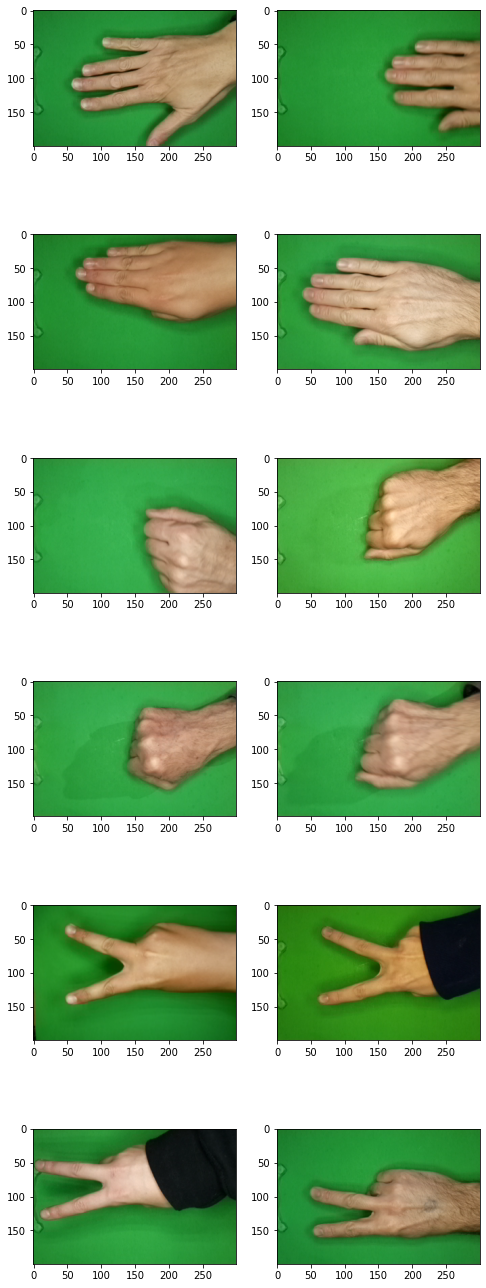

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#menampilkan contoh gambar yang akan digunakan
nrows = 6 #(jumlah baris)
ncols = 2 #(jumlah kolom)
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_P_pic = [os.path.join(train_P, fname) 
                for fname in train_P_names[pic_index-4:pic_index]]
next_R_pic = [os.path.join(train_R, fname) 
                for fname in train_R_names[pic_index-4:pic_index]]
next_S_pic = [os.path.join(train_S, fname) 
                for fname in train_S_names[pic_index-4:pic_index]]
for i, img_path in enumerate(next_P_pic + next_R_pic + next_S_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Augmentasi
train_datagen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1/255,  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


# melakukan training setelah augmentasi
train_generator = train_datagen.flow_from_directory(
        '/tmp/train/',  
        classes = ['paper', 'rock', 'scissors'],
        target_size=(150, 150), 
        batch_size=30,
        class_mode='categorical')

# melakukan testing dengan file yang telah diaugmentasi
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/val/', 
        classes = ['paper', 'rock', 'scissors'],
        target_size=(150, 150),  
        batch_size=10,
        class_mode='categorical',
        shuffle=True)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           input_shape = (150, 150, 3),
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2) ),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                    tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                    tf.keras.layers.Conv2D(512, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),                                   
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

Stride: parameter nilai pergeseran filter (model ini menggunakan nilai 2x2)

Padding: parameter nilai piksel yang akan ditambahkan pada setiap sisi input (model ini menggunakan "same" berarti ukuran sama dengan dimensi input). jumlah layer=jumlah neuron.

Kernel layer: menggunakan he_normal

Bias layer: menggunakan zeros, merupakan nilai default parameter bias_initializer. Seperti cth mensetting nilai parameter untuk "HeNormal. Berarti menggunakan nilai 32 bias lapisan sebelum memulai training


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

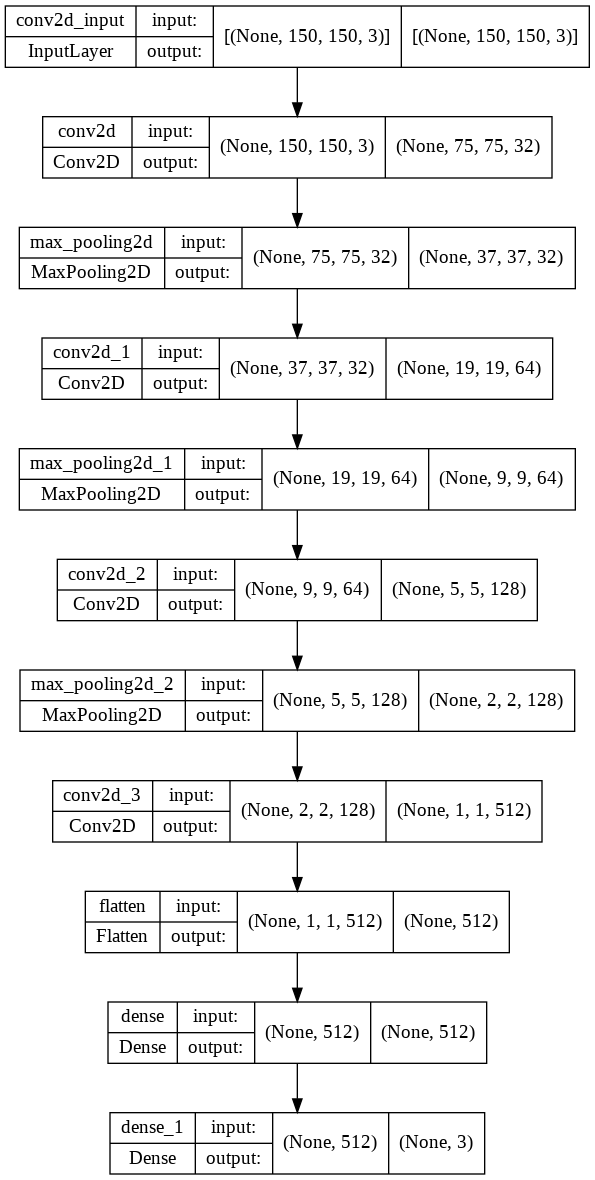

In [ ]:
# Contoh model architecture plot
from tensorflow.keras.utils import plot_model
# summarize model 1
plot_model(model, 'model_1_summary.png', show_shapes=True)

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=18,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/50
18/18 [==============================] - 8s 411ms/step - loss: 1.0650 - accuracy: 0.4333 - val_loss: 0.9561 - val_accuracy: 0.6000
Epoch 2/50
18/18 [==============================] - 7s 407ms/step - loss: 0.7633 - accuracy: 0.6748 - val_loss: 0.6544 - val_accuracy: 0.6875
Epoch 3/50
18/18 [==============================] - 8s 414ms/step - loss: 0.4616 - accuracy: 0.8056 - val_loss: 0.4231 - val_accuracy: 0.8500
Epoch 4/50
18/18 [==============================] - 7s 401ms/step - loss: 0.3777 - accuracy: 0.8648 - val_loss: 0.2563 - val_accuracy: 0.9250
Epoch 5/50
18/18 [==============================] - 7s 397ms/step - loss: 0.2652 - accuracy: 0.9060 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoch 6/50
18/18 [==============================] - 7s 391ms/step - loss: 0.3154 - accuracy: 0.8872 - val_loss: 0.1759 - val_accuracy: 0.9625
Epoch 7/50
18/18 [==============================] - 7s 394ms/step - loss: 0.2846 - accuracy: 0.8796 - val_loss: 0.2168 - val_accuracy: 0.9375
Epoch 

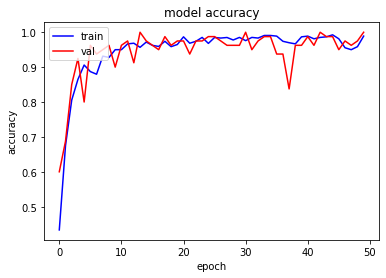

<function matplotlib.pyplot.show(*args, **kw)>

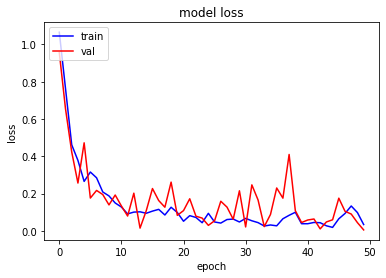

In [ ]:
#Plot kurva data latih dan validasi
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show

Saving OLBaBUjL8DE58OvS.png to OLBaBUjL8DE58OvS.png
[[0. 0. 1.]]
Gunting


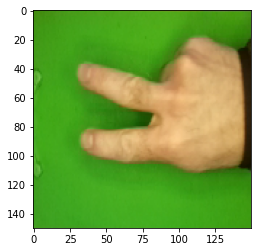

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=2)
  print(classes)
  if classes[0,0] == 1.0:
      print('Kertas')
  elif classes[0,1] == 1.0:
   print('Batu')
  else:
      print('Gunting')

#Profil

Nama: Makrufiah Sakatri

Kota: Kota Yogyakarta

Provinsi: Daerah Istimewa Yogyakarta